In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
plt.style.use('seaborn')
%matplotlib notebook

# Numerical Friedmann equation solver

$$\frac{H^2}{H_0^2} = \Omega_{0,R}a^{-4} + \Omega_{0,M}a^{-3} + \Omega_{0,\Lambda}$$

$$\Rightarrow a_{n+1} = dt H_0 \sqrt{\Omega_{0,R}a_n^{-2} + \Omega_{0,M}a_n^{-1} + \Omega_{0,\Lambda}a_n^2} + a_n$$

In [2]:
def solveFriedmann(tstart,tstop,nt,omega0R = 8.4e-5,omega0M = 0.3, omega0L = 0.699916,a0 = 1e-16):
    """
    Function for solving the Friedmann equation numerically in the LCDM.
    returns (times,scaleFactor)
    """

    # --- Setup arrays ---
    ts    = np.logspace(np.log10(tstart),np.log10(tstop),nt)
    dts   = np.diff(ts)
    avals = np.zeros_like(ts)
    
    # --- Ugly step neccesary because np.diff removes 1 element from ts ---
    avals = np.delete(avals,nt-1)
    ts = np.delete(ts,nt-1)
    
    # --- Integrate ----
    an = a0
    for i,dt in enumerate(dts):
        avals[i] = an
        an += dt * np.sqrt(omega0R * np.power(an,-2) + omega0M * np.power(an,-1) + omega0L * np.power(an,2))
        
    return ts, avals

In [3]:
def secondsToHubbletime(seconds):
    """
    Helper function to convert seconds to fractions of Hubble time.
    Returns fraction of Hubble time at (input) seconds
    """
    H0 = 70 * u.km/(u.s * u.Mpc)
    return seconds / (1/H0).to('s').value

In [4]:
# --- Lambda CDM parameters from Ryden ---
omega0R = 8.4e-5
omega0M = 0.3
omega0L = 1. - omega0R - omega0M

# --- Simulation parameters ---
tstart = secondsToHubbletime(1e-3) #start time in Hubble time
tstop  = 4    #end time in Hubble time
nt    = 10000 #number of timesteps

# --- Run simulation ---
ts, avals = solveFriedmann(tstart,tstop,nt)

### Plot results

<IPython.core.display.Javascript object>


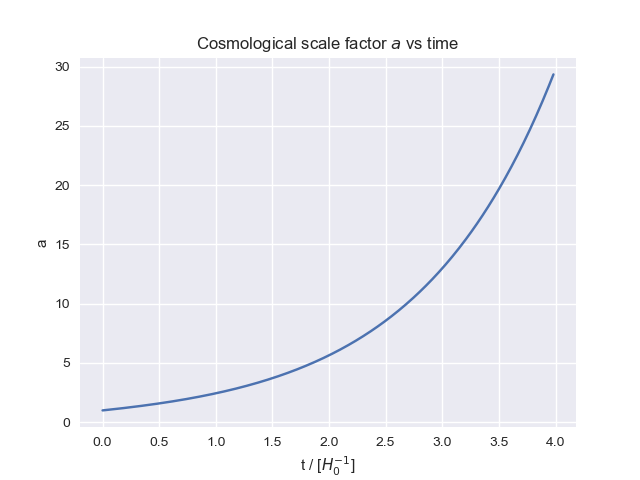

Text(0.5, 1.0, 'Cosmological scale factor $a$ vs time')

In [6]:
fig,ax = plt.subplots()
ax.plot(ts,avals)
ax.set_xlabel(r't / [$H_0^{-1}$]')
ax.set_ylabel('a')
ax.set_title(r'Cosmological scale factor $a$ vs time')

# General differential equation solver

### Define solving procedure

In [11]:
def solveDE(dydt,tstart,tstop,nt,y0,tspace='log'):
    """
    Function for solving diff. eq of the form dy/dt  = f(t, y)
    """

    # --- Setup arrays ---
    if tspace == 'log':
        ts = np.logspace(np.log10(tstart),np.log10(tstop),nt)
    elif tspace == 'lin':
        ts = np.linspace(np.log10(tstart),np.log10(tstop),nt)

    dts   = np.diff(ts)
    yvals = np.zeros_like(ts)
    
    # --- Ugly step neccesary because np.diff removes 1 element from ts ---
    yvals = np.delete(yvals,nt-1)
    ts = np.delete(ts,nt-1)
    
    # --- Integrate ----
    yn = y0
    for i,dt in enumerate(dts):
        yvals[i] = yn
        yn += dt * dydt(yn,ts[i])
        
    return ts, yvals

### Run integration

In [18]:
# --- Helper functions ---
def secondsToHubbletime(seconds):
    """
    Helper function to convert seconds to fractions of Hubble time.
    Returns fraction of Hubble time at (input) seconds
    """
    H0 = 70 * u.km/(u.s * u.Mpc)
    return seconds / (1/H0).to('s').value

# --- Lambda CDM parameters from Ryden ---
H0 = 70 #km/(s * Mpc)
omega0R = 8.4e-5
omega0M = 0.3
omega0L = 1. - omega0R - omega0M

In [16]:
dadt = lambda a,t: np.sqrt(omega0R * np.power(a,-2) + omega0M * np.power(a,-1) + omega0L * np.power(a,2))

ts, avals = solveDE(dadt,tstart=secondsToHubbletime(1e-3),tstop=1,nt=10000,y0=1e-16)

### Generate analytical and CLASS results for comparison

In [24]:
analyticalAs = (np.sinh(3*ts/2 * np.sqrt(omega0L))**2 * omega0M/omega0L)**(1/3)

### Plot results

<IPython.core.display.Javascript object>


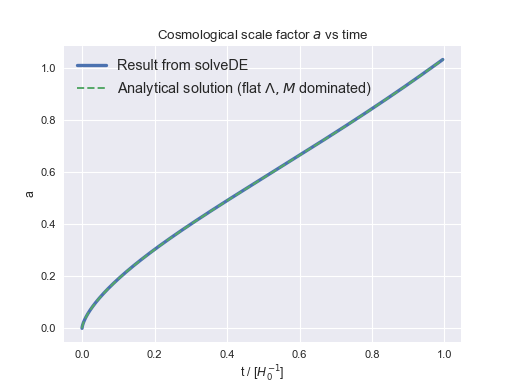

In [41]:
fig,ax = plt.subplots()
ax.plot(ts,avals,lw=3,label='Result from solveDE')
ax.plot(ts,analyticalAs,'--',label=r'Analytical solution (flat $\Lambda, M$ dominated)')
ax.set_xlabel(r't / [$H_0^{-1}$]')
ax.set_ylabel('a')
ax.set_title(r'Cosmological scale factor $a$ vs time')
ax.legend(fontsize=13)